In [1]:
# This demo draws heavily from the handwritten digit example in
# Chapter 2 of Francois Chollet's "Deep Learning with Python" book.
# I've added a simpler single-layer example first before moving to
# the 2-layer example. -George Chen (CMU Fall 2017)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.python import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

flattened_train_images = train_images.reshape(len(train_images), -1)  # flattens out each training image
flattened_train_images = flattened_train_images.astype(np.float32) / 255  # rescale to be between 0 and 1
flattened_test_images = test_images.reshape(len(test_images), -1)  # flattens out each test image
flattened_test_images = flattened_test_images.astype(np.float32) / 255  # rescale to be between 0 and 1

from keras.utils import to_categorical
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jiangchang/opt/anaconda3/lib/python3.7/site-pack

In [2]:
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

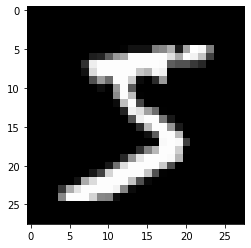

In [3]:
plt.imshow(train_images[0], cmap='gray')

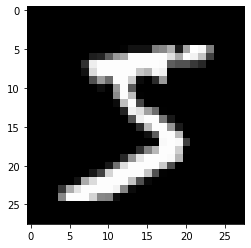

In [4]:
plt.imshow(flattened_train_images[0].reshape(28, 28), cmap='gray')#why the degree of gray is the same before and after

In [7]:
flattened_train_images.shape

(60000, 784)

In [8]:
flattened_train_images[:,5:10]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
test_labels.shape

(10000,)

In [26]:
train_labels.shape

(60000,)

In [25]:
train_labels_categorical.shape

(60000, 10)

In [12]:
# extremely shallow single-layer model
single_layer_model = Sequential()  # this is Keras's way of specifying a model that is a single sequence of layers
single_layer_model.add(Dense(10, activation='softmax', input_shape=(784,)))
single_layer_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
single_layer_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [24]:
print(flattened_train_images.shape)
print(train_labels_categorical.shape)

(60000, 784)
(60000, 10)


In [14]:
single_layer_model.fit(flattened_train_images,
                       train_labels_categorical,
                       validation_split=0.2,
                       epochs=5,
                       batch_size=128)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 13us/step - loss: 0.7447 - acc: 0.8195 - val_loss: 0.4058 - val_acc: 0.8970
Epoch 2/5
48000/48000 [==============================] - 0s 10us/step - loss: 0.3887 - acc: 0.8965 - val_loss: 0.3331 - val_acc: 0.9118
Epoch 3/5
48000/48000 [==============================] - 0s 10us/step - loss: 0.3378 - acc: 0.9073 - val_loss: 0.3062 - val_acc: 0.9167
Epoch 4/5
48000/48000 [==============================] - 0s 10us/step - loss: 0.3145 - acc: 0.9127 - val_loss: 0.2925 - val_acc: 0.9188
Epoch 5/5
48000/48000 [==============================] - 1s 11us/step - loss: 0.3001 - acc: 0.9170 - val_loss: 0.2841 - val_acc: 0.9213


In [15]:
# two-layer model
two_layer_model = Sequential()  # this is Keras's way of specifying a model that is a single sequence of layers
two_layer_model.add(Dense(512, activation='relu', input_shape=(784,)))
two_layer_model.add(Dense(10, activation='softmax'))
two_layer_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
two_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
two_layer_model.fit(flattened_train_images,
                    train_labels_categorical,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 41us/step - loss: 0.2946 - acc: 0.9157 - val_loss: 0.1593 - val_acc: 0.9551
Epoch 2/5
48000/48000 [==============================] - 2s 36us/step - loss: 0.1216 - acc: 0.9652 - val_loss: 0.1073 - val_acc: 0.9686
Epoch 3/5
48000/48000 [==============================] - 2s 35us/step - loss: 0.0790 - acc: 0.9774 - val_loss: 0.0913 - val_acc: 0.9725
Epoch 4/5
48000/48000 [==============================] - 2s 36us/step - loss: 0.0580 - acc: 0.9831 - val_loss: 0.0856 - val_acc: 0.9736
Epoch 5/5
48000/48000 [==============================] - 2s 38us/step - loss: 0.0412 - acc: 0.9884 - val_loss: 0.0756 - val_acc: 0.9754


## Finally evaluate on test data

In [17]:
test_loss, test_acc = single_layer_model.evaluate(flattened_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 11us/step
Test accuracy: 0.9205


In [18]:
test_loss, test_acc = two_layer_model.evaluate(flattened_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 21us/step
Test accuracy: 0.9789


In [20]:
test_loss
test_acc

0.9789

In [32]:
print(flattened_test_images.shape)
test_labels_categorical.sum(axis = 0)

(10000, 784)


array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
       1009.], dtype=float32)